# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 9</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



# The Traveling Salesman Problem
In questa esercitazione utilizziamo un algoritmo genetico per risolvere un problema di ottimizzazione, il problema del commesso viaggiatore (TSP). 
Nel problema del Commesso viaggiatore, un venditore deve visitare un set di $N$ città con posizioni $\vec{c}_i$ cercando di minimizzare la lunghezza totale del percorso.
Le condizioni da rispettare sono che parta da una città e ritorni alla città di partenza alla fine del percorso. 

***Scrivere un codice per risolvere il problema TSP con un Algoritmo Genetico***

Applicare il codice per l'ottimizzazione di un percorso di
- 34 città poste randomicamente su una circonferenza.
- 34 città poste randomicamente in un quadrato.

Mostrare
- un grafico dell'andamento della funzione costo $L^{(2)}$ del percorso migliore, mediato sulla metà migliore della popolazione, in funzione del numero di generazioni.
- un grafico dell' percorso migliore in coordinate cartesiane

## Algoritmi Genetici 
Gli algoritmi genetici nascono come applicazione alla programmazione dei fenomeni di adattamento che avvengono in natura. 
Gli elementi principali di un algoritmo genetico è una popolazione di individui, che possono subire delle mutazioni e che possono essere ordinati sulla base di un criterio di "fitness". L'algoritmo è strutturato in modo da favorire l'evoluzione degli individui che sulla base del criterio di "fitness" sono i migliori. Ogni nuova popolazione, frutto di una mutazione costituisce una nuova generazione. 

## Struttura del codice 

L'algoritmo si struttura in questo modo. Sono state create tre classi: 
- una classe `City`: come argomenti le posizioni `m_x`, `m_y` delle città e un'etichetta `m_label`. Ciascuna città viene identificata univocamente da questa etichetta, definita arbitrariamente in fase di creazione di un percorso. La classe ha inoltre due metodi `circle_position_gen` e `circle_position_gen` che generano una posizione casuale rispettivamente su una circonferenza di raggio R passato come argomento e in un guadrato di lato l passato come argomento. 
- Una classe `Paths` che ha come elementi: 
    - `m_data`: un vector di `City`, che rappresenta il riferimento rispetto a cui valutare a quale etichetta corrisponde ciascuna città. 
    - `m_current_path`: vector di `City` posti nell'ordine effettivo
    - `m_path`: vector di interi contenente le etichette delle città, nell'ordine in cui si trovano. 
   
   Vi sono due metodi `circle_path_generator` e `square_path_generator` che generano rispettivamente un percorso di N città su una circonferenza o all'interno di un quadrato e lo salvano all'interno di m_data. 
   
   Nota: i vettori `m_data`,`m_current_path`,`m_path` iniziano sempre con la città 0, la città definita all'inizio del codice come la prima città da visitare, ma non terminano con essa. Questo è stato definito per rendere più agevole l'implementazione dei metodi di mutazione. Tuttavia quando printiamo i percorsi e quando calcoliamo la distanza totale percorsa durante il percorso, si tiene conto del fatto che una volta visitata l'ultima città il commesso viaggiatore debba tornare alla città di partenza.  
    - il metodo `total_distance` viene utilizzato per calcolare la distanza totale percorsa dal commesso viaggiatore, implementa la funzione costo 
   $$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
    - il metodo `Set_City_Order` prende in argomento un vector di interi, che corrisponde al vector di etichette poste nel nuovo ordine e definisce a partire da questa il nuovo ordine delle città contenute in `m_current_path`. 
    
    - `Check_path()` esegue un controllo sui vector ordinati e controlla che la prima città sia sempre la città con label 0.
    - Il metodo `mutation` chiama in modo casuale uno dei diversi metodi di mutazione:       `inversion_operator`, `shift`, `continuous permutation`, `pair_permutation`
    - Il metodo `Crossingover` esegue un crossing over tra il path di cui stiamo richiamando il metodo e un path passato per argomento. Il metodo Crossingover va a modificare `m_path`, quindi il vettore di Interi e di conseguenza decifra il nuovo percorso `m_current_path`. 
    
- Una classe `Popolazione`che ha come elementi:
    - `m_generation`: vector di `Paths` che raccoglie un insieme di percorsi che collegano diverse città che avranno caratteristiche diverse, lunghezze diverse. 
    - Parametri relativi alla mutabilità dell'algoritmo genetico : `m_mutability`, `m_p`
    - `m_N` che rappresenta il numero di individui, cioè il numero di diversi cammini per la generazione, di fatto la dimensione del vector `m_generation` e `m_n`, ossia il numero di Città per ciascun percorso. 
    - `m_mean`, `m_sigma`per salvare le informazioni sulla statistica
    - `m_best` per salvare la distanza del miglior percorso. 
    

Infine la funzione `Length_Selector_Operator` prende in argomento un vector i percorsi e li riordina in dal più breve al più lungo

### Algoritmo

Si crea una popolazione di partenza di $N_{paths} = 400 $ percorsi, ciascuno creato come mutazione del percorso originale. 
Una volta creata la popolazione originale si ordina la popolazione in funzione della lunghezza totale del percorso e si seleziona l'individuo j con l'algoritmo $j= int(M \times r^p)+1$ dove $r$ è un numero random uniforme $r\in[0,1)$ e $p$ un adeguato esponente. 

Quindi si procede per un numero n di iterazioni a eseguire delle mutazioni, ciascuna che avviene con una probabilità di 
1. pair_permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift di $+n$ posizioni per $m$ città continue (escludendo la prima).
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Si crea un operatore *crossingover*, chiamato con probabilità $p^{(i)}_c > 50\%$: 
selezionati due genitori, cioè due percorsi, si definisce randomicamente un punto in cui tagliare il vector rappresentante la successione di città, si conserva la prima parte del percorso, ma si completa con le città mancanti, prese dal genitore 2, nell'ordine in cui compaiono nel secondo



# Risultati 

Rappresentiamo quindi di seguito i risultati delle nostre stime, in cui abbiamo utilizzato una popolazione di $N_gen = 500$ e una probabilità di mutazione di $p = 25%$ e di crossover di $80%$

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

In [63]:
colors = {'square':'#f18f01' , 'circle' :'#006E90', 'squarebest': '#a62639' , 'circlebest': '#381d2a'}

In [64]:
theta = np.linspace(0, 2*np.pi, 100)
radius = 1.
a = radius*np.cos(theta)
b = radius*np.sin(theta)

c = [-1, 1, 1, -1,-1 ]
d = [1, 1, -1, -1,1 ]

# Circle Path 


Per trovare il miglior cammino sono state eseguite $N_{iterations} = 2000$ iterazioni, per ciascuna itareazione sono stati fatti $N_{couples} = 200$ accoppiamenti

In [66]:
n, L_best, L_mean , L_err= np.loadtxt("Results/Circle_data_length.dat", usecols=(0, 1,2, 3), unpack='true')

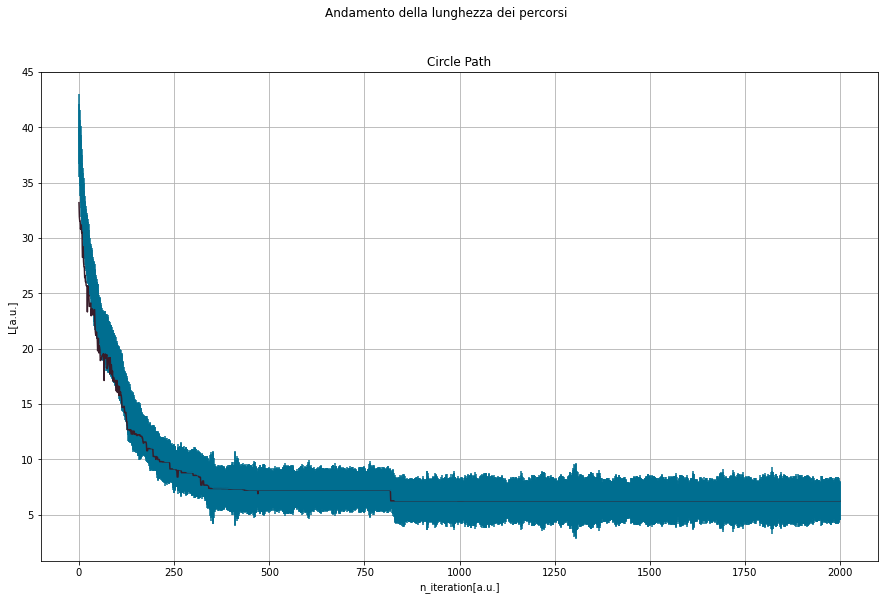

In [67]:
fig, (ax1) = plt.subplots(1, 1, figsize = (15, 9))
fig.suptitle('Andamento della lunghezza dei percorsi')

ax1.plot(n,L_best , color = colors["circlebest"])
ax1.errorbar(n, L_mean, L_err,color = colors["circle"] )


ax1.set_title("Circle Path")
ax1.set_ylabel("L[a.u.]")
ax1.set_xlabel("n_iteration[a.u.]")
ax1.grid()

In [72]:
x_circle_best, y_circle_best = np.loadtxt("Results/Best_Path_circle.dat", usecols=(1,2), unpack='true')
x_circle, y_circle = np.loadtxt("Results/circle_path.dat", usecols=(1,2), unpack='true')

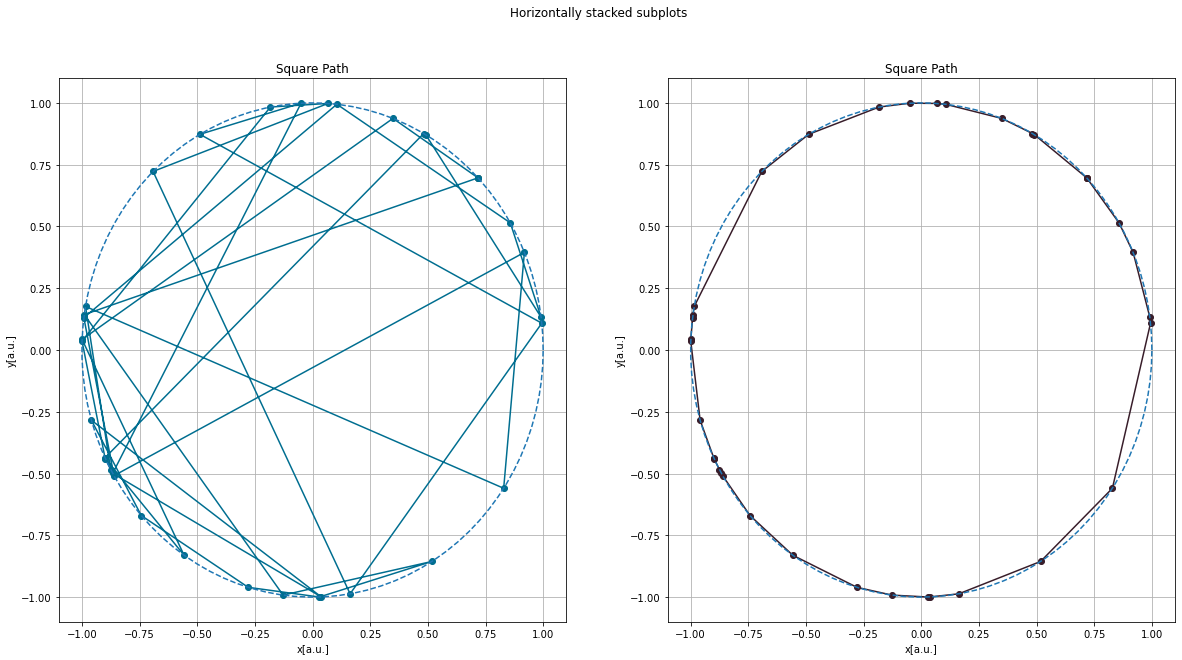

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x_circle, y_circle , marker= 'o', color = colors["circle"])
ax1.set_title("Square Path")
ax1.plot(a, b, linestyle = "--")
ax1.scatter(x_circle[0], y_circle[0], marker = 'o')
ax1.scatter(x_circle[-1], y_circle[-1], marker = 'o')
ax1.set_xlabel("x[a.u.]")
ax1.set_ylabel("y[a.u.]")
ax1.grid()

ax2.plot(x_circle_best, y_circle_best,marker = 'o', color = colors["circlebest"])
ax2.set_title("Square Path")
ax2.plot(a, b, linestyle = "--")
ax2.scatter(x_circle[0], y_circle[0], marker = 'o')
ax2.scatter(x_circle[-1], y_circle[-1], marker = 'o')
ax2.set_xlabel("x[a.u.]")
ax2.set_ylabel("y[a.u.]")
ax2.grid()

I risultati ottenuti mostrano come sia stato possibile applicare l'algoritmo per determinare il percorso più breve. Osserviamo che con buona sicurezza abbiamo trovato il percorso effettivamente migliore in quanto otteniamo come miglior percorso quello che segue l'andamento della circonferenza. 

Osserviamo inoltre l'andamento della lunghezza media in funzione del numero di iterazioni svolte. Notiamo che dopo poche ripetizioni si osserva una rapida decrescita della curva, quindi si giunge al percorso di lunghezza minima dopo circa 1000 iterazioni 

# Square Path 


Per trovare il miglior cammino sono state eseguite $N_{iterations} = 5000$ iterazioni, per ciascuna itareazione sono stati fatti $N_{couples} = 200$ accoppiamenti

In [80]:
n, L_best, L_mean , L_err= np.loadtxt("Square_data_length.dat", usecols=(0, 1,2, 3), unpack='true')

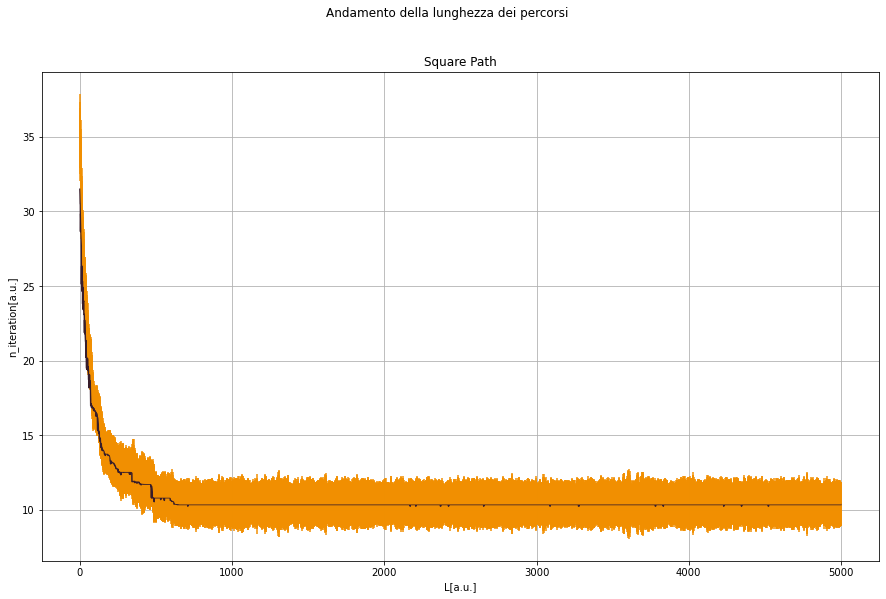

In [81]:
fig, (ax1) = plt.subplots(1, 1, figsize = (15, 9))
fig.suptitle('Andamento della lunghezza dei percorsi')

ax1.plot(n,L_best , color = colors["circlebest"])
ax1.errorbar(n, L_mean, L_err,color = colors["square"] )


ax1.set_title("Square Path")
ax1.set_xlabel("L[a.u.]")
ax1.set_ylabel("n_iteration[a.u.]")
ax1.grid()

In [86]:
x_square_best, y_square_best = np.loadtxt("Best_Path_square.dat", usecols=(1,2), unpack='true')
x_square, y_square= np.loadtxt("square_path.dat", usecols=(1,2), unpack='true')

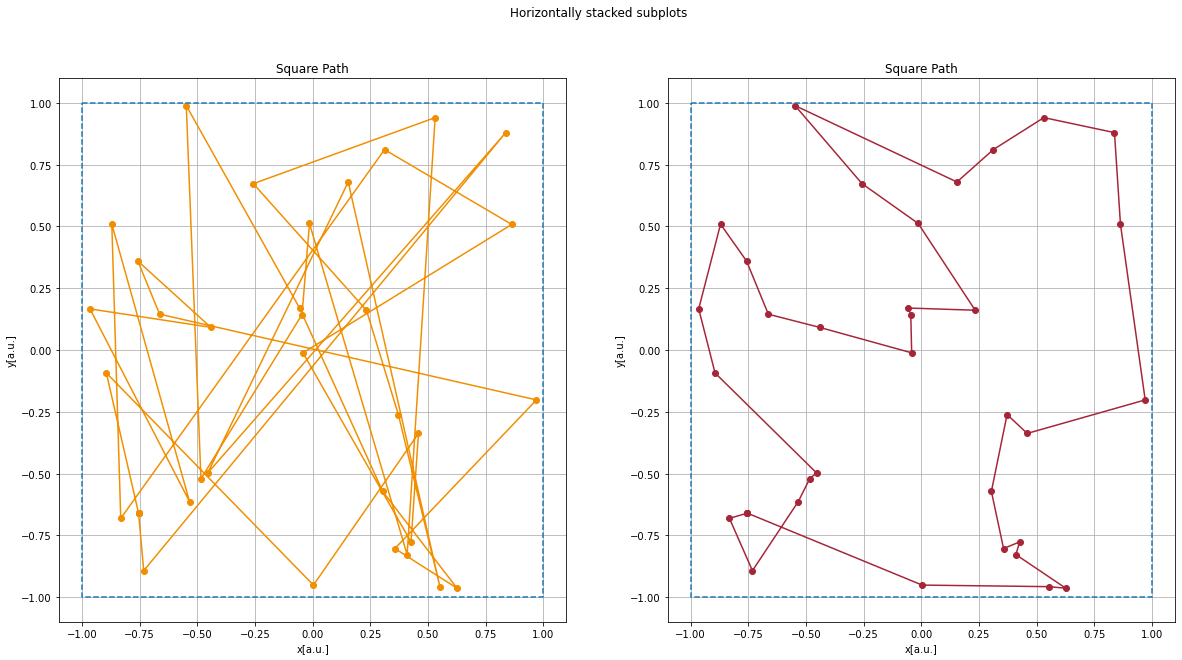

In [87]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x_square_best, y_square_best,marker = 'o', color = colors["squarebest"])
ax1.set_title("Square Path")
ax1.plot(c, d, linestyle = "--")
ax1.scatter(x_square[0], y_square[0], marker = 'o')
ax1.scatter(x_square[-1], y_square[-1], marker = 'o')
ax1.set_xlabel("x[a.u.]")
ax1.set_ylabel("y[a.u.]")
ax1.grid()

ax2.plot(x_square, y_square,marker = 'o', color = colors["square"])
ax2.set_title("Square Path")
ax2.plot(c, d, linestyle = "--")
ax2.scatter(x_square_best[0], y_square_best[0], marker = 'o')
ax2.scatter(x_square_best[-1], y_square_best[-1], marker = 'o')
ax2.set_xlabel("x[a.u.]")
ax2.set_ylabel("y[a.u.]")
ax2.grid()

Osserviamo che per trovare il percorso interno a un quadrato il numero di iterazioni necessarie è stato più elevato. il motivo sta nel fatto che si ha una maggiore complessità nella distribuzione delle città in questo secondo caso. Inoltre osserviamo come il miglior percorso effettivamente trovato risulti essere probabilmente migliorabile. 
L'algoritmo potrebbe essere migliorando, modificando le funzioni di mutazione, oppure parallelizzando l'algoritmo